In [1]:
import LancasterAQ as laq
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(context='paper', style='whitegrid',font='serif',)

In [2]:
data = laq.TabularObject().to_pandas()
data['day_of_week']=pd.to_datetime(data['System Time']).dt.dayofweek
data.head()


,System Time,lat,lon,ultrafines,transport_mode,log_ultrafines,trip_index,day_of_week
0,2022-05-05 15:53:08,54.008605,-2.788483,6591.0,driving,8.793612,0,3
1,2022-05-05 15:53:11,54.008605,-2.788483,7095.0,driving,8.867287,0,3
2,2022-05-05 15:53:12,54.008605,-2.788483,7505.0,driving,8.923458,0,3
3,2022-05-05 15:53:12,54.008605,-2.788483,7505.0,driving,8.923458,0,3
4,2022-05-05 15:53:12,54.008605,-2.788483,7505.0,driving,8.923458,0,3


# Distribution of data 

## Overall

[Text(0.5, 0, 'Ultrafines'), Text(0, 0.5, 'Density')]

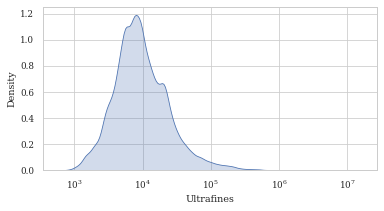

In [3]:
fig, ax = plt.subplots(figsize=(6,3))
sns.kdeplot(x = 'ultrafines', log_scale=True, data=data, shade=True, ax=ax)
ax.set(xlabel = 'Ultrafines', ylabel='Density')

## Split by day 

/home/pindert2/miniconda3/envs/lancasteraq-env/lib/python3.10/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


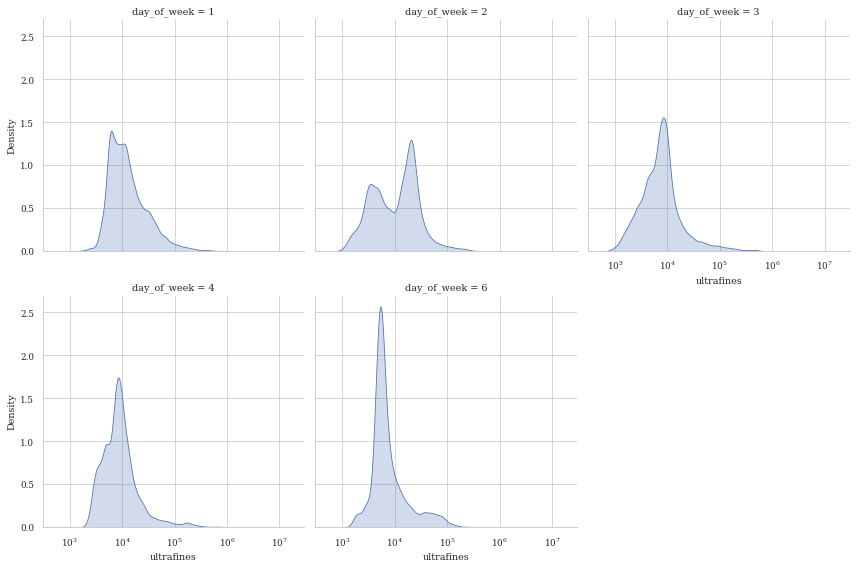

In [4]:
g = sns.FacetGrid(data, col="day_of_week", col_wrap=3, size=4)
g.map(sns.kdeplot, "ultrafines", log_scale=True, shade=True)

## Split by Journey

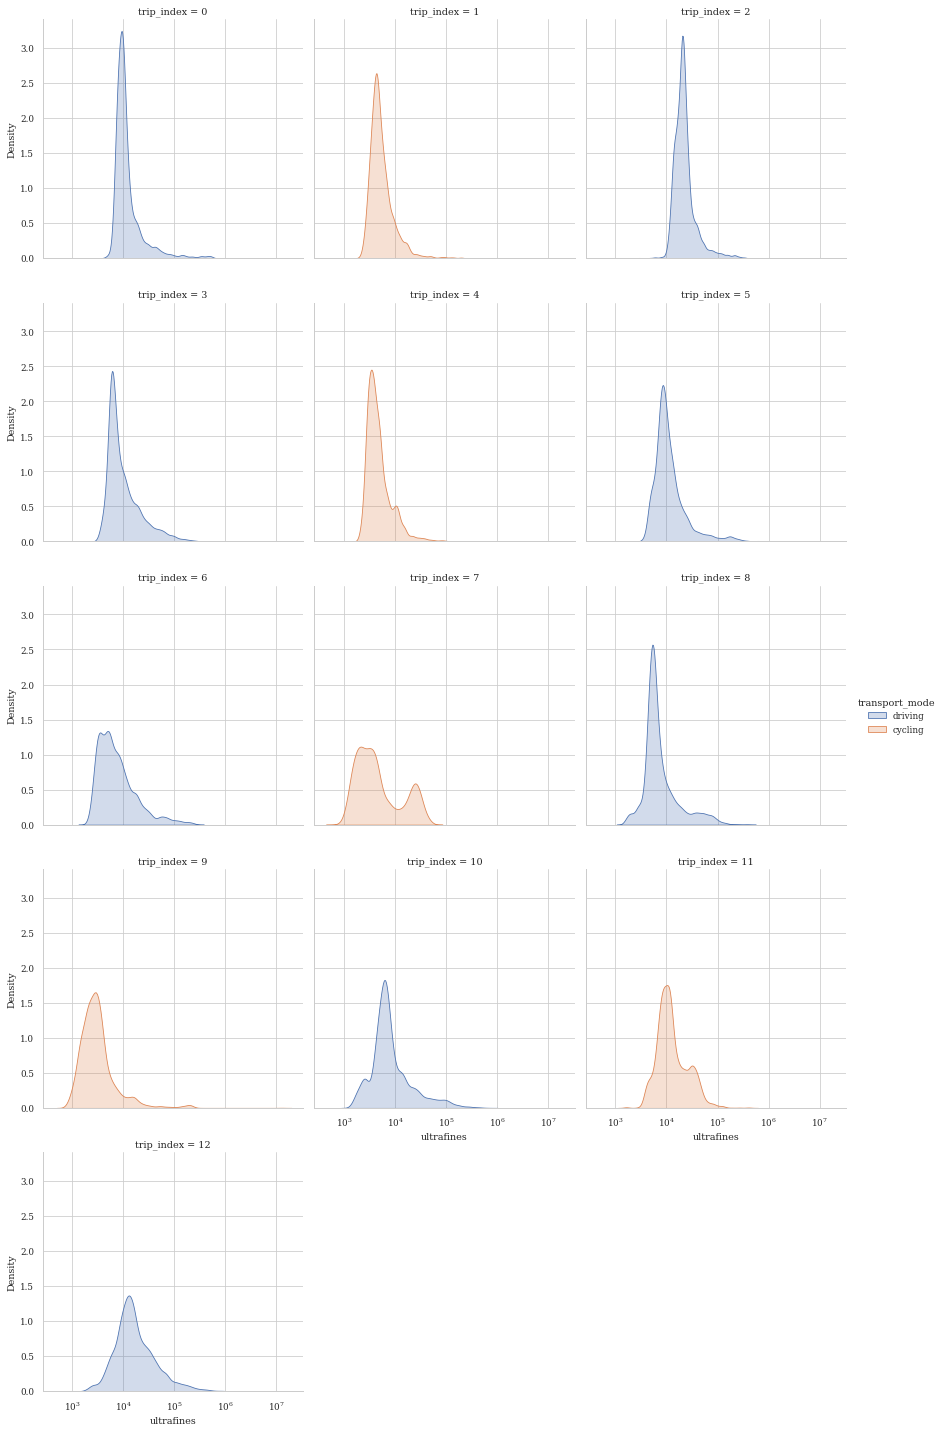

In [5]:
g = sns.FacetGrid(data, col="trip_index", col_wrap=3, height=4, hue='transport_mode')
g.map(sns.kdeplot, "ultrafines", log_scale=True, shade=True)
g.add_legend()

### Or as a violin plot...

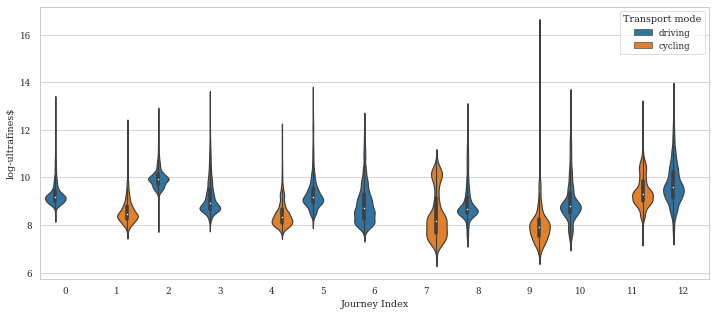

In [6]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.violinplot(y='log_ultrafines', x = 'trip_index', hue='transport_mode', data=data, ax=ax, palette='tab10', scale='width')
ax.set(xlabel = 'Journey Index', ylabel='log-ultrafines$')
ax.get_legend().set_title("Transport mode")

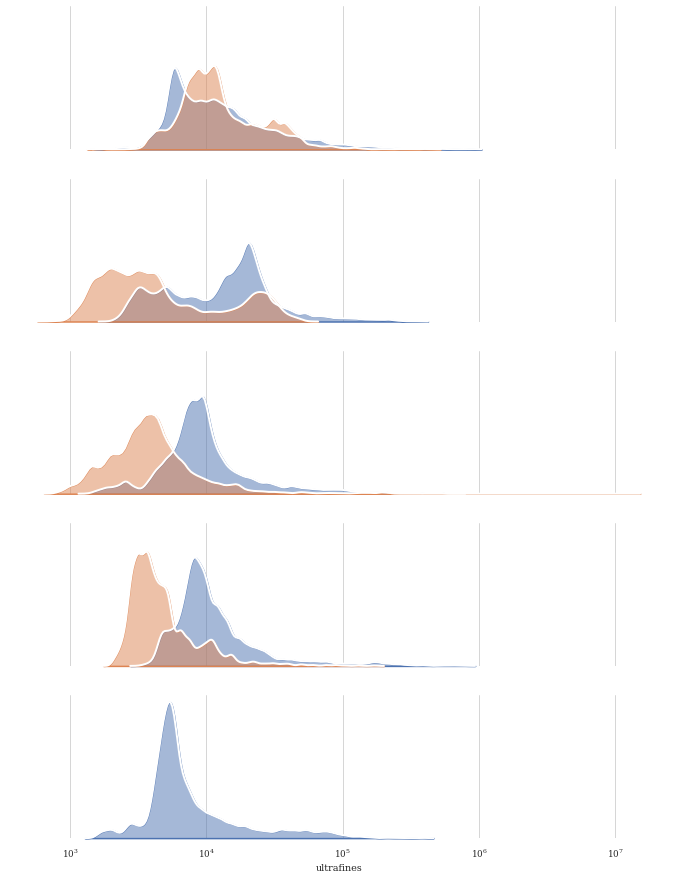

In [7]:
g = sns.FacetGrid(data, row="day_of_week", hue="transport_mode", aspect=4, height=2.5)

g.map(sns.kdeplot, "ultrafines",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=0.5, linewidth=1.5, log_scale=True)
g.map(sns.kdeplot, "ultrafines", clip_on=False, color="w", lw=2, bw_adjust=.5, log_scale=True)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# Data size

## By trip

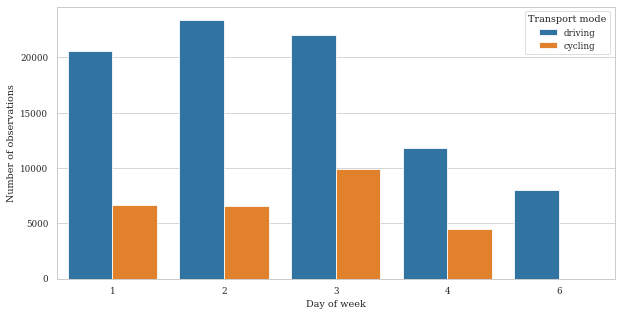

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=data, x = 'day_of_week', hue='transport_mode', palette='tab10', ax=ax)
ax.set(xlabel = 'Day of week', ylabel='Number of observations')
ax.get_legend().set_title("Transport mode")

## By hour of day

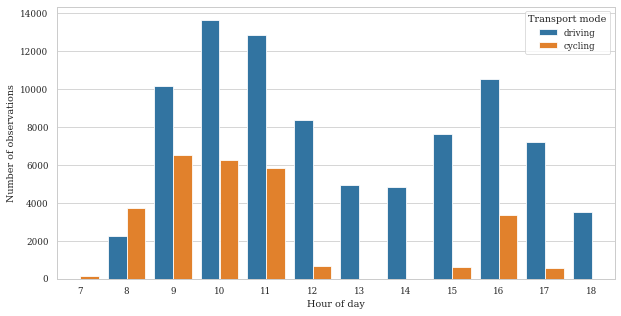

In [12]:
data['hour_of_day']=pd.to_datetime(data['System Time']).dt.hour

fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=data, x = 'hour_of_day', hue='transport_mode', palette='tab10', ax=ax)
ax.set(xlabel = 'Hour of day', ylabel='Number of observations')
ax.get_legend().set_title("Transport mode")

# System information

In [10]:
%load_ext watermark
%watermark -n -u -v -iv -w 

Last updated: Tue Jul 19 2022

Python implementation: CPython
Python version       : 3.10.5
IPython version      : 8.4.0

LancasterAQ: 0.0.1
seaborn    : 0.11.2
pandas     : 1.4.3
matplotlib : 3.5.2
sys        : 3.10.5 | packaged by conda-forge | (main, Jun 14 2022, 07:06:46) [GCC 10.3.0]

Watermark: 2.3.1

